# Comparing Experimental Protocols on the ExtraSensory data set

## Set up the Notebook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import importlib, sys, os
sys.path.insert(0, os.path.abspath('..'))
if(importlib.util.find_spec("mFlow") is None):
    !git clone https://github.com/mlds-lab/mFlow.git
    !pip install ./mFlow
else:
    print("mFlow module found")

mFlow module found


## Import modules

In [4]:
from mFlow.Blocks.data_loader_extrasensory import extrasensory_data_loader
from mFlow.Blocks.filter import MisingLabelFilter,  MisingDataColumnFilter, Take
from mFlow.Blocks.imputer import Imputer
from mFlow.Blocks.normalizer import Normalizer
from mFlow.Blocks.experimental_protocol import ExpTrainTest, ExpCV, ExpWithin
from mFlow.Blocks.results_analysis import ResultsConcat, ResultsCVSummarize, DataYieldReport

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from mFlow.Workflow.workflow import workflow
import mFlow.Workflow.compute_graph


## Define the workflow

This workflow compare the performance estimates produced using two different experimental variations: train/test splits at the instance and the  individual levels.  

The model used is logistic regression with a fixed regularization hyper-parameter. The workflow includes a column filter that screens out feature dimensions that are less than 20% observed, a missing label filter that removes instances without labels, imputation, and feature normalization. Data pre-processing is shared across the two branches of the workflow.

In this experiment, we can see that when the data set is split at the individual level, the accuracy is 5% lower and the F1 score is more than 10% lower when compared to splitting at the instance level. This shows that splitting at the instance level can significantly and artificially improve results due to the weaker form of generalization that this protocol assesses. 

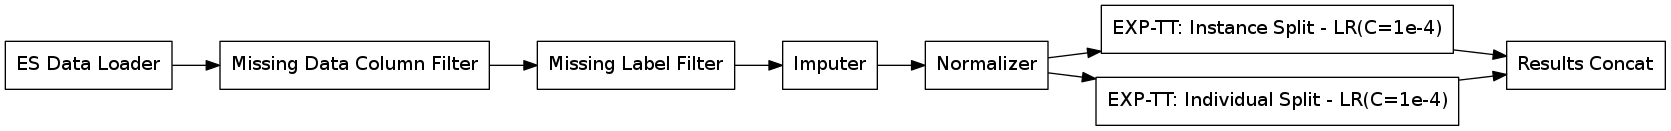

Running Sequential Scheduler

Running step ES Data Loader
  Loading Extrasensory pkl file...

Running step Missing Data Column Filter

Running step Missing Label Filter

Running step Imputer

Running step Normalizer

Running step EXP-TT: Individual Split - LR(C=1e-4)

Running step EXP-TT: Instance Split - LR(C=1e-4)

Running step Results Concat

Workflow complete



In [6]:
metrics     = [accuracy_score, f1_score, precision_score, recall_score]

df_raw      = extrasensory_data_loader(label="SLEEPING");
df_cf       = MisingDataColumnFilter(df_raw);
df_lf       = MisingLabelFilter(df_cf);
df_imp      = Imputer(df_lf, method="mean")
df_norm     = Normalizer(df_imp)

models = {"Instance Split - LR(C=1e-4)": LogisticRegression(solver="lbfgs",max_iter=100)}
res_inst = ExpTrainTest(df_norm, models, metrics=metrics, grouped=False);

models = {"Individual Split - LR(C=1e-4)": LogisticRegression(solver="lbfgs",max_iter=100)}
res_ind = ExpTrainTest(df_norm, models, metrics=metrics, grouped=True);

res_cat = ResultsConcat(res_inst, res_ind)
flow    = workflow({"results":res_cat})
 
flow.draw(); plt.show();
output=flow.run();

In [7]:
display(output["results"]["report"])

,accuracy_score,f1_score,precision_score,recall_score
Instance Split - LR(C=1e-4),0.910366,0.842762,0.860434,0.825801
Individual Split - LR(C=1e-4),0.863394,0.720270,0.834906,0.633314
